In [1]:
import time

import numpy as np

from dasly.das_master import Dasly

In [ ]:
s_rate = 0.25
das = Dasly()
das.load_data(
    folder_path='/mnt/Datastore/usr/kptruong/dasly_repo/data/Svalbard_whale',
    start='20220822 122839',
    duration=30,
    integrate=True,
    chIndex=np.arange(round(5000 * s_rate), round(90000 * s_rate))
)

vmin: -2.39e-10, vmax: 2.39e-10


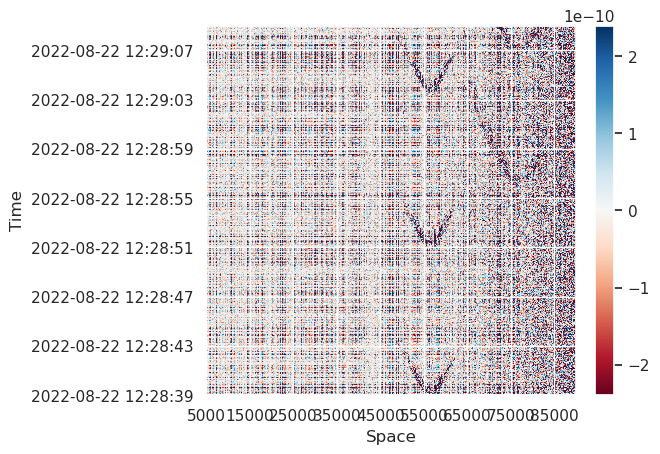

In [3]:
das.heatmap()

In [ ]:
start_time = time.time()
das.bandpass_filter(15, 25)
time_bandpass = time.time()
print(f'time_abs: {time_bandpass - start_time}')

In [ ]:
das.signal = np.abs(das.signal)
time_abs = time.time()
print(f'time_abs: {time_abs - time_bandpass}')

das.sample(meters=100, seconds=1/25)
time_sample = time.time()
print(f'time_sample: {time_sample - time_abs}')


das.gaussian_smooth(-1500.01, -1500, unit='m/s', std_s=500)
time_gauss = time.time()
print(f'time_gauss: {time_gauss - time_sample}')


das.sobel_filter(pos_grads=True)
time_sobel = time.time()
print(f'time_sobel: {time_sobel - time_gauss}')

das.binary_transform(0.95)
time_binary = time.time()
print(f'time_binary: {time_binary - time_sobel}')

das.hough_transform(target_speed=1500, speed_res=10, length_meters=5000, speed_unit='m/s')
time_hough = time.time()
print(f'time_hough: {time_hough - time_binary}')

das.dbscan(eps_seconds=3)
time_dbscan = time.time()
print(f'time_dbscan: {time_dbscan - time_hough}')

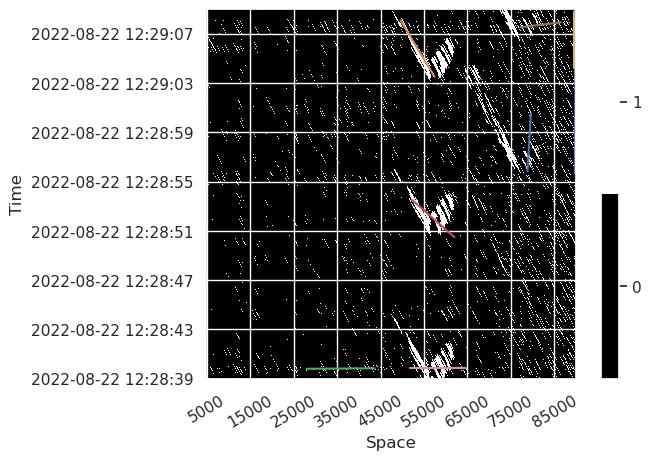

In [5]:
das.heatmap(xticks_rotate=30)

In [6]:
das.lines_df

,speed_kmh,speed_ms,s,t,s1,t1,s2,t2,s1_edge,t1_edge,...,x1,y1,x2,y2,x1_edge,y1_edge,x2_edge,y2_edge,y1_edge_ext,y2_edge_ext
0,6.153846e+02,1.709402e+02,800.0,4.68,78800.0,2022-08-22 12:28:55.840,79600.0,2022-08-22 12:29:00.520,7.592137e+04,2022-08-22 12:28:39.000000000,...,738.0,421.0,746.0,538.0,709.213675,0.000000,760.427350,749.000000,-10372.250000,2044.375000
1,-6.157895e+03,-1.710526e+03,-7800.0,4.56,57400.0,2022-08-22 12:29:03.520,49600.0,2022-08-22 12:29:08.080,8.990000e+04,2022-08-22 12:28:44.520000000,...,524.0,613.0,446.0,727.0,849.000000,138.000000,430.947368,749.000000,1378.846154,138.000000
2,1.404000e+06,3.900000e+05,15600.0,0.04,28000.0,2022-08-22 12:28:39.800,43600.0,2022-08-22 12:28:39.840,5.000000e+03,2022-08-22 12:28:39.741025641,...,230.0,20.0,386.0,21.0,0.000000,18.525641,849.000000,23.967949,18.525641,23.967949
3,-1.160526e+04,-3.223684e+03,-9800.0,3.04,62000.0,2022-08-22 12:28:50.480,52200.0,2022-08-22 12:28:53.520,8.990000e+04,2022-08-22 12:28:41.825306122,...,570.0,287.0,472.0,363.0,849.000000,70.632653,0.000000,729.040816,729.040816,70.632653
4,5.421687e+01,1.506024e+01,200.0,13.28,89700.0,2022-08-22 12:28:55.680,89900.0,2022-08-22 12:29:08.960,8.944880e+04,2022-08-22 12:28:39.000000000,...,847.0,417.0,849.0,749.0,844.487952,0.000000,849.000000,749.000000,-140185.000000,749.000000
5,8.370000e+04,2.325000e+04,9300.0,0.40,77200.0,2022-08-22 12:29:07.520,86500.0,2022-08-22 12:29:07.920,5.000000e+03,2022-08-22 12:29:04.414623656,...,722.0,713.0,815.0,723.0,0.000000,635.365591,849.000000,726.655914,635.365591,726.655914
6,inf,inf,13000.0,0.00,51700.0,2022-08-22 12:28:39.880,64700.0,2022-08-22 12:28:39.880,-inf,2022-08-22 12:28:39.880000000,...,467.0,22.0,597.0,22.0,-inf,22.000000,inf,22.000000,22.000000,22.000000
7,0.000000e+00,0.000000e+00,0.0,6.00,89700.0,2022-08-22 12:29:02.960,89700.0,2022-08-22 12:29:08.960,NaN,NaT,...,847.0,599.0,847.0,749.0,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000000e+00,0.000000e+00,0.0,4.48,89600.0,2022-08-22 12:29:04.200,89600.0,2022-08-22 12:29:08.680,NaN,NaT,...,846.0,630.0,846.0,742.0,NaN,NaN,NaN,NaN,NaN,NaN
